# Hedonic vs Utilitarian classification

## First: let us import necessary libraries and find file names

In [1]:
import numpy as np
import pandas as pd
import json 
from missingpy import MissForest
from os import walk

mypath='./reviews_features'
_, _, filenames = next(walk(mypath))
print(filenames)

['health.json', 'sports.json', 'groceries.json', 'pet.json', 'instruments.json', 'digital_music.json', 'movies.json', 'home.json', 'baby.json', 'tools.json', 'clothing.json', 'video.json', 'garden.json', 'toys.json', 'cds_vinyl.json', 'beauty.json', 'office.json', 'electronics.json', 'kindle.json', 'automotive.json', 'apps_android.json', 'books.json', 'games.json', 'mobile.json']


/home/pedro/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Lets import all the data files store in a DataFrame

In [2]:
df = pd.DataFrame(
    columns=['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText','overall', 'summary', 'unixReviewTime', 'reviewTime', 'features','amazonCategory'],
)
for name in filenames:  
    temp = pd.read_json(mypath+'/'+name , lines =True)
    temp['amazonCategory'] = name[:-5]
    df = df.append( temp ,ignore_index=True)

**Note that we have stored the category itself in amazonCategory column**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232748 entries, 0 to 232747
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      232748 non-null  object
 1   asin            232748 non-null  object
 2   reviewerName    230910 non-null  object
 3   helpful         232748 non-null  object
 4   reviewText      232748 non-null  object
 5   overall         232748 non-null  object
 6   summary         232748 non-null  object
 7   unixReviewTime  232748 non-null  object
 8   reviewTime      232748 non-null  object
 9   features        232748 non-null  object
 10  amazonCategory  232748 non-null  object
dtypes: object(11)
memory usage: 19.5+ MB


**We don't have any problem reggarding nulls on our features**

In [4]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,features,amazonCategory
0,A1JUPR7LPMYG1X,B00009V2QX,"Chef Kim ""My Review""","[0, 0]",Its time for me to purchase another box. great...,4,Great,1356739200,"12 29, 2012","[-0.098792488888888, 0.24677984888888901, 0.37...",health
1,A6YT8ATZ4SEKT,B00009V2QX,C. Moran,"[0, 0]","Recieved OLD black and silver procell package,...",3,recieved OLD STOCK,1401840000,"06 4, 2014","[-0.07366211999999901, 0.345128, 0.30181372, -...",health
2,A0678500JUN3N7KUG4PS,B000056OWW,GigiS,"[0, 0]",The best cold sore remover product I've ever u...,5,Great product.,1403049600,"06 18, 2014","[-0.23953764705882302, 0.21731229411764702, 0....",health
3,A4DRGD09QEE9I,B00009V2QX,"C. R. Dyer ""home maker""","[0, 0]",If you've ever noticed your flashlights are di...,5,Batteries,1357516800,"01 7, 2013","[-0.22847052941176402, 0.270014588235294, 0.45...",health
4,ABT4HGNR22RWO,B00009V2QX,Daniel L. Kellett Sr.,"[0, 0]",Received fast and as described. I have only u...,5,Big bang for your buck...,1320105600,"11 1, 2011","[-0.17499656521739101, 0.29650973913043405, 0....",health


In [5]:
print(pd.unique(df.amazonCategory), len(pd.unique(df.amazonCategory)))

['health' 'sports' 'groceries' 'pet' 'instruments' 'digital_music'
 'movies' 'home' 'baby' 'tools' 'clothing' 'video' 'garden' 'toys'
 'cds_vinyl' 'beauty' 'office' 'electronics' 'kindle' 'automotive'
 'apps_android' 'books' 'games' 'mobile'] 24


**We have taken and put all the categories correctly**

## Data visualizations: just an overview

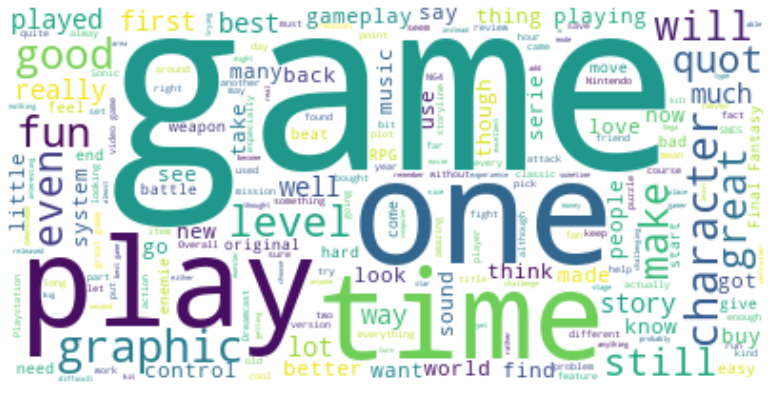

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

text = " ".join(review for review in df.loc[df.amazonCategory=='games'].reviewText)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

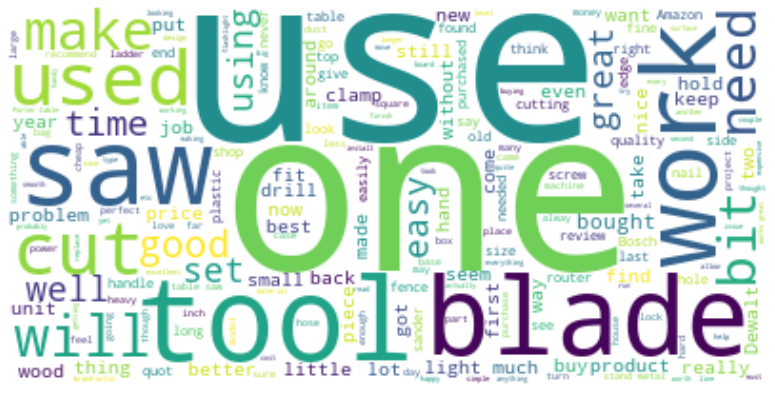

In [7]:
text = " ".join(review for review in df.loc[df.amazonCategory=='tools'].reviewText)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

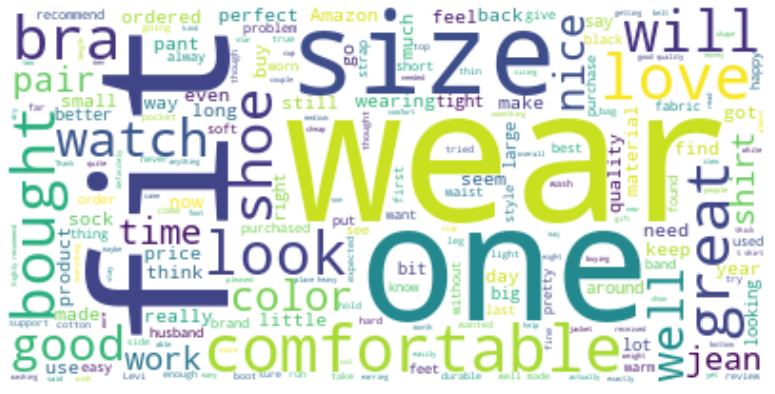

In [8]:
text = " ".join(review for review in df.loc[df.amazonCategory=='clothing'].reviewText)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
df.loc[df.amazonCategory=='games']['reviewText'][212119]

"Back in 1993, a little game called Myst appeared. Everyone went crazy for  it -- it featured amazing graphics, addicting search and explore gameplay,  and it was actually educational. A main part of the game was reading, so it  figures that many parents were so supportive of it. It was also, though,  terribly spooky at times. You could be anywhere in the world of Myst and  still feel a general sense of... well, spookiness.But Myst was in 1993  -- and even though it held well throughout several years (which is  amazingly good), it started to be noticed more as a classic than current  technology.So how well can &quot;Riven: The Sequel To Myst&quot; hold up  against &quot;current technology&quot; and the original classic? By simply  making the adventure more intresting, more long, and with more  &quot;spookiness&quot; -- an original Myst-cliche that adds drama to the  game.&quot;Riven&quot; is even more rewarding than &quot;Myst&quot; so  much to the fact that it is sometimes speechless.

## Impute the categories we already know
### Intro

- Here we have an important note: 

    -> Q1 (quadrand 1) = utilitarian and not hedonic
    
    -> Q2 (quadrand 2) = utilitarian and hedonic
    
    -> Q3 (quadrand 3) = not utilitarian and not hedonic
    
    -> Q4 (quadrand 4) = not utilitarian and hedonic
    
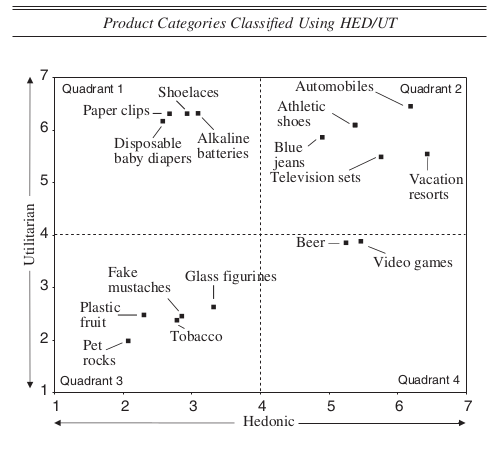

**Note that automobile and video games (Amazon) can be directly inputted in Q2 and Q4 respectively (paper)**

  Here we can identify other possible combinations like inside sports on amazon we will probably find athletic shoes and shoelaces, or inside of home we probably find television sets and glass figurines
  
  But we will have to take a look into each product's name to match them

### Import paper classes

In [10]:
paper_table = pd.read_csv('JMR_paper_table.csv')
paper_table

,name,category
0,shoelaces,Q1
1,paper clips,Q1
2,disposable baby diapers,Q1
3,alkaline batteries,Q1
4,automobiles,Q2
5,athletic shoes,Q2
6,blue jeans,Q2
7,television sets,Q2
8,vacation resorts,Q2
9,glass figurines,Q3


### Putting nans on our dataset target label

In [11]:
df['class'] = np.nan

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232748 entries, 0 to 232747
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewerID      232748 non-null  object 
 1   asin            232748 non-null  object 
 2   reviewerName    230910 non-null  object 
 3   helpful         232748 non-null  object 
 4   reviewText      232748 non-null  object 
 5   overall         232748 non-null  object 
 6   summary         232748 non-null  object 
 7   unixReviewTime  232748 non-null  object 
 8   reviewTime      232748 non-null  object 
 9   features        232748 non-null  object 
 10  amazonCategory  232748 non-null  object 
 11  class           0 non-null       float64
dtypes: float64(1), object(11)
memory usage: 21.3+ MB


### Metadata import 
We found a problem here: the product's name is in the metadata and not with the reviews

Inside of metadata title is the product's name. We will have to face a large problem to join the meta data into the dataset itself

In [13]:
metaPath='./metadata'
_, _, files = next(walk(metaPath))
print(files)

['meta_Patio_Lawn_and_Garden.json', 'meta_Arts_Crafts_and_Sewing.json', 'meta_CDs_and_Vinyl.json', 'meta_Prime_Pantry.json', 'meta_Toys_and_Games.json', 'meta_Industrial_and_Scientific.json', 'meta_Appliances.json', 'meta_Clothing_Shoes_and_Jewelry.json', 'meta_Pet_Supplies.json', 'meta_Books.json', 'meta_Luxury_Beauty.json', 'meta_Cell_Phones_and_Accessories.json', 'meta_Grocery_and_Gourmet_Food.json', 'meta_Tools_and_Home_Improvement.json', 'meta_Sports_and_Outdoors.json', 'meta_Office_Products.json', 'meta_Software.json', 'meta_Kindle_Store.json', 'meta_Home_and_Kitchen.json', 'meta_Magazine_Subscriptions.json', 'meta_Video_Games.json', 'meta_Movies_and_TV.json', 'meta_Automotive.json', 'meta_All_Beauty.json', 'meta_Digital_Music.json', 'meta_AMAZON_FASHION.json', 'meta_Gift_Cards.json', 'meta_Electronics.json', 'meta_Musical_Instruments.json']


In [14]:
meta = pd.read_json(metaPath+'/meta_Appliances.json', lines =True) # limit to 600mb
desired_columns= ['title', 'description', 'feature', 'asin']
meta = meta[desired_columns]
meta.head()

,title,description,feature,asin
0,Tupperware Freezer Square Round Container Set ...,[],[Each 3-pc. set includes two 7/8-cup/200 mL an...,7301113188
1,2 X Tupperware Pure &amp; Fresh Unique Covered...,[2 X Tupperware Pure & Fresh Unique Covered Co...,[2 X Tupperware Pure & Fresh Unique Covered Co...,7861850250
2,The Cigar - Moments of Pleasure,[],[],8792559360
3,Caraselle 2X 50G Appliance Descalene,"[Multi purpost descaler, especially suited to ...",[],9792954481
4,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,[Full gauge and size beveled-edge; furnished w...,[Returns will not be honored on this closeout ...,B00002N5EL


In [15]:
clone = df
merged = clone.merge(meta, how='left', on='asin')
merged.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,features,amazonCategory,class,title,description,feature
0,A1JUPR7LPMYG1X,B00009V2QX,"Chef Kim ""My Review""","[0, 0]",Its time for me to purchase another box. great...,4,Great,1356739200,"12 29, 2012","[-0.098792488888888, 0.24677984888888901, 0.37...",health,NaN,NaN,NaN,NaN
1,A6YT8ATZ4SEKT,B00009V2QX,C. Moran,"[0, 0]","Recieved OLD black and silver procell package,...",3,recieved OLD STOCK,1401840000,"06 4, 2014","[-0.07366211999999901, 0.345128, 0.30181372, -...",health,NaN,NaN,NaN,NaN
2,A0678500JUN3N7KUG4PS,B000056OWW,GigiS,"[0, 0]",The best cold sore remover product I've ever u...,5,Great product.,1403049600,"06 18, 2014","[-0.23953764705882302, 0.21731229411764702, 0....",health,NaN,NaN,NaN,NaN
3,A4DRGD09QEE9I,B00009V2QX,"C. R. Dyer ""home maker""","[0, 0]",If you've ever noticed your flashlights are di...,5,Batteries,1357516800,"01 7, 2013","[-0.22847052941176402, 0.270014588235294, 0.45...",health,NaN,NaN,NaN,NaN
4,ABT4HGNR22RWO,B00009V2QX,Daniel L. Kellett Sr.,"[0, 0]",Received fast and as described. I have only u...,5,Big bang for your buck...,1320105600,"11 1, 2011","[-0.17499656521739101, 0.29650973913043405, 0....",health,NaN,NaN,NaN,NaN


In [16]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232786 entries, 0 to 232785
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewerID      232786 non-null  object 
 1   asin            232786 non-null  object 
 2   reviewerName    230948 non-null  object 
 3   helpful         232786 non-null  object 
 4   reviewText      232786 non-null  object 
 5   overall         232786 non-null  object 
 6   summary         232786 non-null  object 
 7   unixReviewTime  232786 non-null  object 
 8   reviewTime      232786 non-null  object 
 9   features        232786 non-null  object 
 10  amazonCategory  232786 non-null  object 
 11  class           0 non-null       float64
 12  title           76 non-null      object 
 13  description     76 non-null      object 
 14  feature         76 non-null      object 
dtypes: float64(1), object(14)
memory usage: 28.4+ MB


In [17]:
meta = pd.DataFrame(
    columns=['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText','overall', 'summary', 'unixReviewTime', 'reviewTime', 'features','amazonCategory'],
)
for name in files:  
    temp = pd.read_json(mypath+'/'+name , lines =True)
    temp['amazonCategory'] = name[:-5]
    df = df.append( temp ,ignore_index=True)

ValueError: Expected object or value